In [265]:
!pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preparation to final dataset

In [267]:
df_upload=pd.read_excel('WorldBank_Data_1.xlsx', sheet_name='Data')

In [268]:
df_upload.head()

,Country Name,Country Code,Continent,Series Name,Series Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Albania,ALB,Europe,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,...,32.8,33.7,33.10,30.1,30.1,29.4,NaN,NaN,NaN,NaN
1,Albania,ALB,Europe,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,...,100.0,99.9,99.90,100.0,100.0,100.0,100.00,100.0,100.0,NaN
2,Albania,ALB,Europe,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,40.02,NaN,NaN,NaN,44.17,NaN,NaN,NaN
3,Albania,ALB,Europe,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.10,NaN,NaN,NaN,45.69,NaN,NaN,NaN
4,Albania,ALB,Europe,Account ownership at a financial institution o...,FX.OWN.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,42.04,NaN,NaN,NaN,42.59,NaN,NaN,NaN


In [269]:
year_columns=[col for col in df_upload.columns if col.startswith('19') or col.startswith('20') ]

In [270]:
# Change dtype to float
for col in year_columns:
    df_upload[col] = pd.to_numeric(df_upload[col], errors='coerce')

In [271]:
#I will try to do random forest to check what affects gini index
gini_null_df=df_upload[df_upload['Series Name']=='Gini index']
gini_null_count=gini_null_df[year_columns].isnull().sum().sum()
print(gini_null_count)

5456


In [272]:
'''I will fill null values
Country charactertics don't change dramatically usually that's why first I am going to use forth progpagatio
and then back propagation for what is missing. I will do it for whole dataset'''
df_cols_to_fill_only=df_upload[year_columns].copy()
df_cols_to_fill_only=df_cols_to_fill_only[year_columns].ffill(axis=1)
df_cols_to_fill_only=df_cols_to_fill_only[year_columns].bfill(axis=1)
#all that are totally null let's replace with 0
df_cols_to_fill_only=df_cols_to_fill_only[year_columns].fillna(0)
df_upload[year_columns]=df_cols_to_fill_only
df_upload.head()

,Country Name,Country Code,Continent,Series Name,Series Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Albania,ALB,Europe,Gini index,SI.POV.GINI,27.00,27.00,27.00,27.00,27.00,...,32.80,33.70,33.10,30.10,30.10,29.40,29.40,29.40,29.40,29.40
1,Albania,ALB,Europe,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.00,100.00,100.00,100.00,100.00,...,100.00,99.90,99.90,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,Albania,ALB,Europe,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,28.27,28.27,28.27,28.27,28.27,...,37.99,37.99,40.02,40.02,40.02,40.02,44.17,44.17,44.17,44.17
3,Albania,ALB,Europe,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,22.67,22.67,22.67,22.67,22.67,...,33.59,33.59,38.10,38.10,38.10,38.10,45.69,45.69,45.69,45.69
4,Albania,ALB,Europe,Account ownership at a financial institution o...,FX.OWN.TOTL.MA.ZS,33.66,33.66,33.66,33.66,33.66,...,42.52,42.52,42.04,42.04,42.04,42.04,42.59,42.59,42.59,42.59


In [273]:
print(df_upload.isnull().sum().sum())

0


In [274]:
df_upload.head()

,Country Name,Country Code,Continent,Series Name,Series Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Albania,ALB,Europe,Gini index,SI.POV.GINI,27.00,27.00,27.00,27.00,27.00,...,32.80,33.70,33.10,30.10,30.10,29.40,29.40,29.40,29.40,29.40
1,Albania,ALB,Europe,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.00,100.00,100.00,100.00,100.00,...,100.00,99.90,99.90,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,Albania,ALB,Europe,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,28.27,28.27,28.27,28.27,28.27,...,37.99,37.99,40.02,40.02,40.02,40.02,44.17,44.17,44.17,44.17
3,Albania,ALB,Europe,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,22.67,22.67,22.67,22.67,22.67,...,33.59,33.59,38.10,38.10,38.10,38.10,45.69,45.69,45.69,45.69
4,Albania,ALB,Europe,Account ownership at a financial institution o...,FX.OWN.TOTL.MA.ZS,33.66,33.66,33.66,33.66,33.66,...,42.52,42.52,42.04,42.04,42.04,42.04,42.59,42.59,42.59,42.59


In [275]:
# Change dataset -> years to long format and Series_name to short format
#cols=df_upload.columns
#print(cols)
df_upload=df_upload.drop('Series Code', axis=1)
df_step_1=df_upload.melt(id_vars=['Country Name', 'Country Code', 'Series Name','Continent'],var_name="Year", value_name="Value").copy()
# Clean Year name
df_step_1['Year'] = df_step_1['Year'].str[:4]

df=df_step_1.pivot_table(index=['Country Name', 'Country Code','Continent','Year'],
           columns='Series Name',
           values='Value',
           aggfunc='first').reset_index()

In [276]:
# All other nulls let's replace with 0


In [277]:
df.head(10)

Series Name,Country Name,Country Code,Continent,Year,Access to electricity (% of population),Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)",Adequacy of social insurance programs (% of total welfare of beneficiary households),"Birth rate, crude (per 1,000 people)",...,"Share of youth not in education, employment or training, total (% of youth population)","Specialist surgical workforce (per 100,000 population)","Suicide mortality rate (per 100,000 population)",Tax revenue (current LCU),Taxes on exports (% of tax revenue),Taxes on goods and services (current LCU),"Taxes on income, profits and capital gains (% of revenue)","Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24)
0,Albania,ALB,Europe,1980,100.0,28.27,22.67,33.66,29.186345,26.756,...,41.805,7.07,4.78,3.016700e+10,0.000913,1.885000e+10,8.319688,58.8,0.2,9.6
1,Albania,ALB,Europe,1981,100.0,28.27,22.67,33.66,29.186345,26.476,...,41.805,7.07,4.78,3.016700e+10,0.000913,1.885000e+10,8.319688,58.8,0.2,9.6
2,Albania,ALB,Europe,1982,100.0,28.27,22.67,33.66,29.186345,26.575,...,41.805,7.07,4.78,3.016700e+10,0.000913,1.885000e+10,8.319688,58.8,0.2,9.6
3,Albania,ALB,Europe,1983,100.0,28.27,22.67,33.66,29.186345,26.442,...,41.805,7.07,4.78,3.016700e+10,0.000913,1.885000e+10,8.319688,58.8,0.2,9.6
4,Albania,ALB,Europe,1984,100.0,28.27,22.67,33.66,29.186345,26.513,...,41.805,7.07,4.78,3.016700e+10,0.000913,1.885000e+10,8.319688,58.8,0.2,9.6
5,Albania,ALB,Europe,1985,100.0,28.27,22.67,33.66,29.186345,26.464,...,41.805,7.07,4.78,3.016700e+10,0.000913,1.885000e+10,8.319688,58.8,0.2,9.6
6,Albania,ALB,Europe,1986,100.0,28.27,22.67,33.66,29.186345,26.312,...,41.805,7.07,4.78,3.016700e+10,0.000913,1.885000e+10,8.319688,58.8,0.2,9.6
7,Albania,ALB,Europe,1987,100.0,28.27,22.67,33.66,29.186345,26.260,...,41.805,7.07,4.78,3.016700e+10,0.000913,1.885000e+10,8.319688,58.8,0.2,9.6
8,Albania,ALB,Europe,1988,100.0,28.27,22.67,33.66,29.186345,26.214,...,41.805,7.07,4.78,3.016700e+10,0.000913,1.885000e+10,8.319688,58.8,0.2,9.6
9,Albania,ALB,Europe,1989,100.0,28.27,22.67,33.66,29.186345,26.179,...,41.805,7.07,4.78,3.016700e+10,0.000913,1.885000e+10,8.319688,58.8,0.2,9.6


### Data assesment and further preparation

In [278]:
summary = pd.DataFrame({
    'dtype': df.dtypes,
    'nulls': df.isnull().sum(),
    'non_nulls': df.notnull().sum(),
    'unique': df.nunique()
}).sort_values(by='nulls', ascending=False)

print(summary)

                                                      dtype  nulls  non_nulls  \
Series Name                                                                     
Country Name                                         object      0       7515   
Country Code                                         object      0       7515   
Continent                                            object      0       7515   
Year                                                 object      0       7515   
Access to electricity (% of population)             float64      0       7515   
...                                                     ...    ...        ...   
Taxes on goods and services (current LCU)           float64      0       7515   
Taxes on income, profits and capital gains (% o...  float64      0       7515   
Women participating in the three decisions (own...  float64      0       7515   
Women who were first married by age 15 (% of wo...  float64      0       7515   
Women who were first married

In [279]:
df.describe()

Series Name,Access to electricity (% of population),Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)",Adequacy of social insurance programs (% of total welfare of beneficiary households),"Birth rate, crude (per 1,000 people)","Cause of death, by injury (% of total)","Condom use, population ages 15-24, female (% of females ages 15-24)","Condom use, population ages 15-24, male (% of males ages 15-24)",Coverage of social insurance programs (% of population),...,"Share of youth not in education, employment or training, total (% of youth population)","Specialist surgical workforce (per 100,000 population)","Suicide mortality rate (per 100,000 population)",Tax revenue (current LCU),Taxes on exports (% of tax revenue),Taxes on goods and services (current LCU),"Taxes on income, profits and capital gains (% of revenue)","Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24)
count,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,...,7515.000000,7515.000000,7515.000000,7.515000e+03,7515.000000,7.515000e+03,7515.000000,7515.000000,7515.000000,7515.000000
mean,73.663620,42.680551,40.331634,45.114802,18.477456,25.667153,8.360060,6.223313,13.654145,11.858307,...,23.028393,32.136532,10.088614,5.054185e+12,1.357497,1.889683e+12,18.763983,19.240027,4.718816,18.790832
std,33.540630,33.374648,33.753690,33.399152,19.449547,12.482374,4.293425,12.368619,22.026384,16.770977,...,13.096747,37.297560,8.256649,3.770599e+13,5.358458,1.443263e+13,13.368240,27.259940,7.101313,18.291650
min,0.533899,0.000000,0.000000,0.000000,0.000000,4.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,-25.224244,0.000000e+00,-1.350857,0.000000,0.000000,0.000000
25%,48.900000,14.900000,10.880000,17.280000,0.000000,13.900000,5.866635,0.000000,0.000000,0.000000,...,12.940000,1.410000,4.630000,6.770500e+08,0.000000,2.038700e+08,9.839912,0.000000,0.000000,0.100000
50%,94.600000,33.670000,29.160000,39.200000,15.473152,24.180000,7.581927,0.000000,0.000000,3.259231,...,21.321000,13.090000,7.590000,2.747800e+10,0.000165,1.321327e+10,18.179968,0.000000,1.800000,15.300000
75%,100.000000,73.490000,71.270000,75.460000,31.506591,36.063500,10.165098,7.100000,24.600000,17.673357,...,31.158500,59.320000,13.310000,3.274800e+11,0.284626,1.452688e+11,26.801971,39.300000,6.800000,30.300000
max,100.000000,100.000000,100.000000,100.000000,96.405021,56.596000,73.428775,66.000000,79.200000,60.233127,...,79.549000,166.810000,53.060000,6.587010e+14,51.677005,2.664720e+14,78.012685,92.800000,50.300000,83.500000


<Axes: >

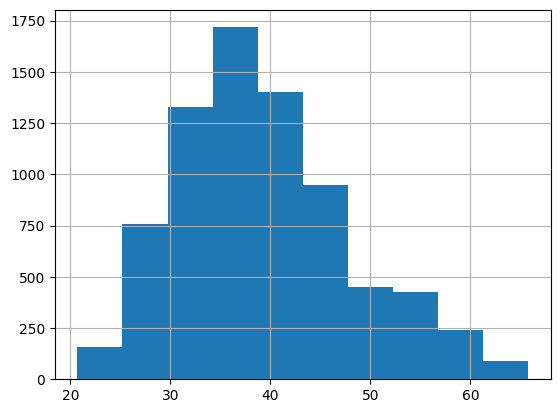

In [280]:
# I will a
df['Gini index'].hist()

I will put it into bins since I want to have random forest classification
The bins will be by 0.1

In [281]:
bins=np.arange(0,110,10)
labels_gini=[f'{round(i,1)} - {round(i+10,1)}' for i in np.arange(0,100,10)]

df['Gini_index_bins']=pd.cut(df['Gini index'],bins=bins,labels=labels_gini)

In [282]:
print(df[['Gini index','Gini_index_bins']].drop_duplicates())

Series Name  Gini index Gini_index_bins
0                  27.0         20 - 30
22                 31.7         30 - 40
25                 30.6         30 - 40
28                 30.0         20 - 30
32                 29.0         20 - 30
...                 ...             ...
6549               42.5         40 - 50
6959               44.2         40 - 50
6962               41.0         40 - 50
7010               25.5         20 - 30
7425               59.4         50 - 60

[372 rows x 2 columns]


In [283]:
df['Gini_index_bins'].value_counts()

Gini_index_bins
30 - 40     3371
40 - 50     2166
20 - 30     1005
50 - 60      840
60 - 70      133
0 - 10         0
10 - 20        0
70 - 80        0
80 - 90        0
90 - 100       0
Name: count, dtype: int64

In [284]:
df['Gini index'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 7515 entries, 0 to 7514
Series name: Gini index
Non-Null Count  Dtype  
--------------  -----  
7515 non-null   float64
dtypes: float64(1)
memory usage: 58.8 KB


In [285]:
# I will need to make conitnent uniform for Random forest
df.Continent.value_counts()

Continent
Africa           2250
Europe           1800
Asia             1620
North America     720
South America     540
Oceania           540
0                  45
Name: count, dtype: int64

In [286]:
df['Continent'] = df['Continent'].astype(str)
df.loc[df['Continent'] == '0', 'Continent'] = 'Not_Classified'

### Modelling

In [287]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [288]:
le = LabelEncoder()
df['Continent_encoded'] = le.fit_transform(df['Continent'])

In [289]:
# I was thinkig should I take data only from one year,
# however social enequality could have rise or fall during last 40 years, so I am going to keep it for now
y=df['Gini_index_bins']
# For X I will drop Country Code and coutnry name
X=df.drop(columns=['Country Name','Country Code','Continent','Gini index','Gini_index_bins'], axis=0)

In [290]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [291]:
print(y_train.isnull().sum().sum())

0


In [292]:
rf=RandomForestClassifier()

In [293]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [295]:
accuracy_train = rf.score(X_train, y_train)
accuracy_test = rf.score(X_test, y_test)
print("Accuracy train:", accuracy_train)
print("Accuracy test:", accuracy_test)

Accuracy train: 1.0
Accuracy test: 0.9723257051623204


In [301]:
# 1 seems to much for train split let's limit it a littile
rf2 = RandomForestClassifier(min_samples_split=10, max_depth=8, min_samples_leaf=7,max_features='sqrt')
rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=7, min_samples_split=10)

In [302]:
accuracy_train = rf2.score(X_train, y_train)
accuracy_test = rf.score(X_test, y_test)
print("Accuracy train:", accuracy_train)
print("Accuracy test:", accuracy_test)

Accuracy train: 0.9320440028388929
Accuracy test: 0.9723257051623204


In [ ]:
# This model seems not to overfit and even test score is better than train

In [306]:
# Feature improtance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
top_20 = feature_importance.sort_values(ascending=False).head(20)
print(top_20)

Series Name
Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)                                                        0.024114
Poverty headcount ratio at national poverty lines (% of population)                                                        0.022898
Incidence of HIV, all (per 1,000 uninfected population)                                                                    0.022303
Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)                                                        0.021275
People practicing open defecation (% of population)                                                                        0.019127
Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population)                                                        0.016637
International migrant stock (% of population)                                                                              0.014976
People using at least basic drinking water services (% of popula

/tmp/ipykernel_13/3884448420.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


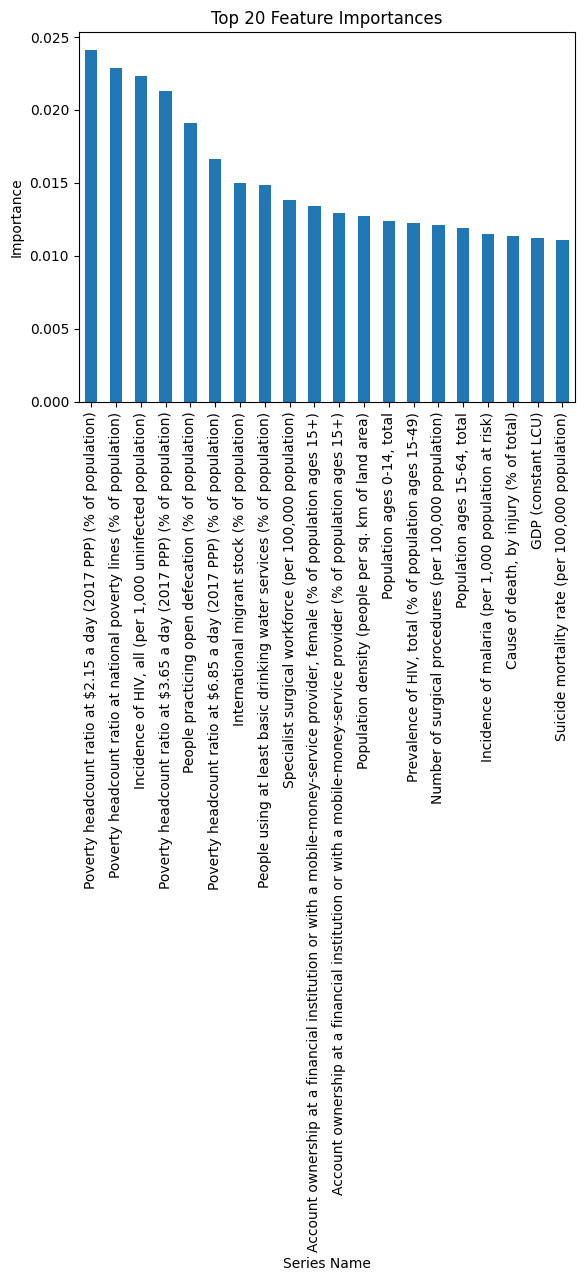

In [305]:


# Plot
top_20.plot(kind='bar')
plt.title("Top 20 Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Top features influencing the Gini Index in the model:

- **Poverty Measures** (most important):  
  - 2.15/day, 3.65/day, 6.85/day thresholds  
  - National poverty line

- **Health Indicators**:  
  - HIV incidence/prevalence  
  - Open defecation  
  - Surgical workforce, procedures  
  - Suicide mortality

- **Access & Inclusion**:  
  - Drinking water access  
  - Financial account ownership (esp. women)

- **Demographics & Density**:  
  - Population age groups  
  - Population density  
  - Migrant stock

- **Economic & Environmental**:  
  - GDP  
  - Malaria incidence  
  - Injury-related deaths

➡️ Income inequality is closely tied to poverty depth, health access, and basic services.